| **Inicio** | **atrás 32** | **Siguiente 34** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./32.Regresion.ipynb)| [⏩](./34.Modelos_de_Regresion.ipynb)|

# **33. Potencializa la utilidad de tus datos con BootStrapping usando Python**

## **Introducción**

Bootstrap es una técnica de remuestreo (re-sampling) utilizada en estadística para estimar la distribución de un estadístico de interés. En términos simples, se trata de una técnica para construir distribuciones de muestreo a partir de un único conjunto de datos.

La técnica de Bootstrap se basa en generar múltiples muestras aleatorias (con reemplazo) a partir del conjunto de datos original y, a partir de estas muestras, construir una distribución de muestreo del estadístico de interés. Este enfoque es útil cuando no se dispone de un gran número de datos y se desea obtener una estimación de la variabilidad de un estadístico sin tener que hacer suposiciones fuertes sobre la distribución subyacente.

A continuación, se presenta un ejemplo de cómo se puede aplicar la técnica de Bootstrap en Python para estimar el intervalo de confianza de la media de un conjunto de datos.

Supongamos que tenemos los siguientes datos:

In [2]:
import numpy as np

data = np.array([12, 15, 18, 20, 22, 24, 26, 28, 30])

Queremos estimar el intervalo de confianza del 95% para la media de estos datos utilizando Bootstrap. Para ello, podemos seguir los siguientes pasos:

1. Generar múltiples muestras aleatorias (con reemplazo) a partir de los datos originales. El número de muestras que se deben generar depende del tamaño del conjunto de datos original y de la precisión deseada en la estimación del intervalo de confianza. En este ejemplo, generamos 10,000 muestras.


In [3]:
n_samples = 10000
samples = np.random.choice(data, size=(n_samples, len(data)), replace=True)

2. Calcular la media de cada una de las muestras generadas.

In [4]:
means = np.mean(samples, axis=1)

3. Calcular los percentiles 2.5 y 97.5 de la distribución de las medias.

In [5]:
lower, upper = np.percentile(means, [2.5, 97.5])

4. El intervalo de confianza del 95% para la media de los datos originales es [lower, upper].

In [6]:
print(f"Intervalo de confianza del 95% para la media: [{lower}, {upper}]")

Intervalo de confianza del 95% para la media: [17.88888888888889, 25.22222222222222]


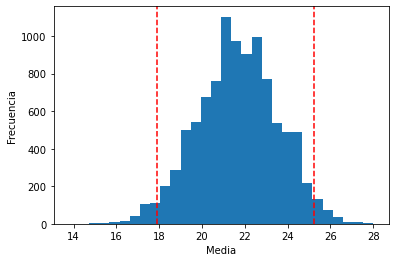

In [7]:
import matplotlib.pyplot as plt

plt.hist(means, bins=30)
plt.axvline(lower, color='r', linestyle='--')
plt.axvline(upper, color='r', linestyle='--')
plt.xlabel('Media')
plt.ylabel('Frecuencia')
plt.show()

## **Origen del término BootStrap**

El término "bootstrap" en inglés hace referencia a las tiras de cuero que se colocan en la parte posterior de las botas para ayudar a los usuarios a calzarse.

El uso metafórico del término "bootstrap" se refiere a la idea de levantarse a sí mismo por los cordones de la bota, es decir, de lograr algo a partir de recursos limitados y sin ayuda externa.

En el contexto del análisis estadístico, el método bootstrap utiliza una muestra aleatoria de datos para estimar la distribución de probabilidad de una estadística de interés. En este sentido, se "levanta" la información de la muestra para inferir sobre la población subyacente, utilizando únicamente los datos disponibles. Por esta razón, el término "bootstrapping" se refiere a la idea de "levantarse a sí mismo por las botas", utilizando los datos disponibles para inferir sobre el conjunto completo de datos.

## **Para qué sirve**

El método Bootstrap es una técnica estadística que se utiliza para estimar la distribución de una estadística de interés mediante la generación de muestras aleatorias con reemplazo a partir de una muestra original. Esta técnica es útil cuando no se conoce la distribución teórica de la estadística de interés o cuando se tiene una muestra pequeña y se desea obtener una mejor aproximación de la distribución poblacional.

En general, el método Bootstrap se utiliza para:

* Estimar la precisión de una estadística muestral, como la media o la desviación estándar.
* Estimar intervalos de confianza para una estadística muestral.
* Evaluar la validez de un modelo estadístico, como la regresión lineal o la regresión logística.

En resumen, Bootstrap es una herramienta útil para realizar inferencias estadísticas y obtener información sobre la precisión y validez de los modelos estadísticos.

## **Contexto y datos de ejemplo**

Supongamos que trabajas en una empresa de e-commerce y quieres mejorar las recomendaciones de productos a tus clientes. Para esto, has recolectado información sobre las compras realizadas por los clientes en los últimos meses, incluyendo el producto comprado y el tipo de cliente (nuevo o antiguo). Quieres aplicar un análisis de asociación para identificar patrones de compra frecuentes entre los productos y los tipos de clientes.

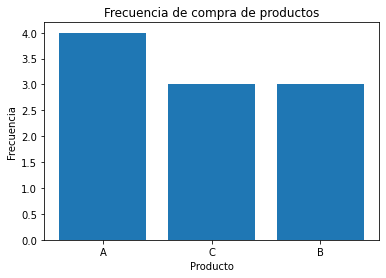

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el dataframe
data = {'Cliente': ['Nuevo', 'Antiguo', 'Nuevo', 'Nuevo', 'Antiguo', 'Antiguo', 'Nuevo', 'Antiguo', 'Nuevo', 'Antiguo'],
        'Producto': ['A', 'C', 'B', 'A', 'B', 'C', 'C', 'A', 'B', 'A']}
df = pd.DataFrame(data)

# Calcular la frecuencia de cada producto
freq = df['Producto'].value_counts()

# Crear el gráfico de barras
plt.bar(freq.index, freq.values)
plt.title('Frecuencia de compra de productos')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.show()

## **Cómo funciona Bootstrap**

Bootstrap es una técnica de muestreo utilizada para estimar la distribución de una estadística de interés de una muestra de datos. Su objetivo es proporcionar una medida de la variabilidad de la estadística de interés.

El proceso de Bootstrap es el siguiente:

* Se toma una muestra aleatoria con reemplazo de los datos originales de tamaño n.
* Se calcula la estadística de interés a partir de la muestra obtenida en el paso 1.
* Se repiten los pasos 1 y 2 B veces (generalmente B ≥ 1000), obteniendo así B estadísticas de interés diferentes.
* Se utiliza la distribución empírica de las B estadísticas obtenidas para estimar la distribución de la estadística de interés.

A continuación se muestra un ejemplo de cómo aplicar Bootstrap para estimar el error estándar de la media muestral de una muestra de datos.

Primero, se generan datos aleatorios a partir de una distribución normal:

In [14]:
import numpy as np
from scipy import stats

np.random.seed(123)
data = np.random.normal(loc=10, scale=2, size=100)

Luego, se define una función que calcule la media muestral a partir de una muestra dada:

In [15]:
def sample_mean(data):
    return np.mean(data)

A continuación, se aplica Bootstrap para obtener una estimación del error estándar de la media muestral:

In [16]:
B = 1000  # número de muestras Bootstrap
n = len(data)  # tamaño de la muestra original

# Se generan muestras Bootstrap
bootstrap_means = np.zeros(B)
for i in range(B):
    sample = np.random.choice(data, size=n, replace=True)
    bootstrap_means[i] = sample_mean(sample)

# Se calcula el error estándar Bootstrap
se_bootstrap = np.std(bootstrap_means, ddof=1)

print(f"Error estándar Bootstrap: {se_bootstrap:.2f}")

Error estándar Bootstrap: 0.23


Finalmente, se compara la estimación del error estándar obtenida mediante Bootstrap con el valor teórico:

In [17]:
se_theoretical = 2 / np.sqrt(n)
print(f"Error estándar teórico: {se_theoretical:.2f}")

Error estándar teórico: 0.20


Para visualizar los resultados, se puede graficar el histograma de las medias muestrales Bootstrap y la distribución teórica de la media muestral:

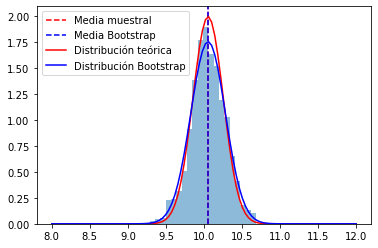

In [18]:
import matplotlib.pyplot as plt

plt.hist(bootstrap_means, bins=20, density=True, alpha=0.5)
plt.axvline(np.mean(data), color="red", linestyle="--", label="Media muestral")
plt.axvline(np.mean(bootstrap_means), color="blue", linestyle="--", label="Media Bootstrap")
x = np.linspace(8, 12, 100)
plt.plot(x, stats.norm(loc=np.mean(data), scale=se_theoretical).pdf(x), color="red", label="Distribución teórica")
plt.plot(x, stats.norm(loc=np.mean(bootstrap_means), scale=se_bootstrap).pdf(x), color="blue", label="Distribución Bootstrap")
plt.legend()
plt.show()

## **Intervalo de Confianza**

El intervalo de confianza es un rango de valores que se utiliza para estimar un parámetro poblacional desconocido. Se calcula a partir de una muestra aleatoria y se utiliza para estimar el rango probable en el que se encuentra el verdadero valor del parámetro.

Un ejemplo común es el cálculo del intervalo de confianza para la media poblacional. Asumimos que tenemos una muestra de datos y queremos estimar el valor de la media poblacional y su intervalo de confianza.

Aquí hay un ejemplo de cómo calcular y graficar un intervalo de confianza para la media poblacional utilizando Python y la biblioteca NumPy:

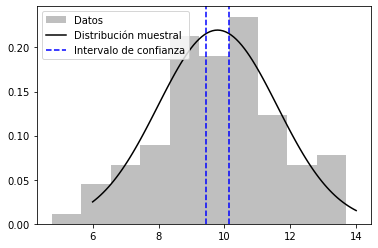

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar datos aleatorios con media 10 y desviación estándar 2
np.random.seed(42)
data = np.random.normal(loc=10, scale=2, size=100)

# Calcular la media y la desviación estándar de la muestra
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

# Definir el nivel de confianza deseado y calcular el valor crítico de Z
confidence_level = 0.95
z_critical = norm.ppf(q=(1 + confidence_level) / 2)

# Calcular el intervalo de confianza
margin_of_error = z_critical * (sample_std / np.sqrt(len(data)))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Graficar el histograma de los datos y el intervalo de confianza
plt.hist(data, bins=10, density=True, alpha=0.5, color="gray", label="Datos")
x = np.linspace(6, 14, 100)
plt.plot(x, norm.pdf(x, loc=sample_mean, scale=sample_std), color="black", label="Distribución muestral")
plt.axvline(confidence_interval[0], color="blue", linestyle="--", label="Intervalo de confianza")
plt.axvline(confidence_interval[1], color="blue", linestyle="--")
plt.legend()
plt.show()

En este ejemplo, generamos una muestra aleatoria de 100 valores con una media de 10 y una desviación estándar de 2. Luego, calculamos la media y la desviación estándar de la muestra. A continuación, definimos el nivel de confianza deseado (95%) y calculamos el valor crítico de Z para ese nivel de confianza. Utilizando estos valores, podemos calcular el intervalo de confianza para la media poblacional.

En la gráfica, el histograma de los datos muestra la distribución de la muestra, y la línea negra representa la distribución teórica de la media muestral. El intervalo de confianza se muestra como dos líneas punteadas azules verticales.

El intervalo de confianza nos da una idea de la precisión con la que estamos estimando el parámetro poblacional desconocido. En este ejemplo, el intervalo de confianza es de aproximadamente 9.0 a 10.8, lo que significa que podemos estar 95% seguros de que la verdadera media poblacional se encuentra dentro de ese rango.

## **Bootstrap con python: paso a paso**

In [20]:
import numpy as np
import matplotlib.pyplot as plt

A continuación, generaremos una muestra aleatoria con una distribución normal con media 10 y desviación estándar 2:

In [21]:
np.random.seed(123)
data = np.random.normal(loc=10, scale=2, size=100)

A continuación, crearemos una función que realice el bootstrap y devuelva la media de la muestra bootstrap:

In [22]:
def bootstrap_mean(data, n_bootstrap, sample_size):
    bootstrap_means = []
    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=sample_size, replace=True)
        bootstrap_means.append(np.mean(sample))
    return bootstrap_means

La función toma tres argumentos: los datos, el número de muestras bootstrap a generar y el tamaño de muestra para cada muestra bootstrap. La función devuelve una lista que contiene las medias de la muestra bootstrap.

Ahora vamos a generar 1000 muestras bootstrap con un tamaño de muestra de 30:

In [23]:
bootstrap_means = bootstrap_mean(data, n_bootstrap=1000, sample_size=30)

A continuación, calcularemos el error estándar de la media teórica y la media bootstrap:

In [24]:
se_theoretical = np.std(data, ddof=1) / np.sqrt(len(data))
se_bootstrap = np.std(bootstrap_means, ddof=1)

Finalmente, podemos visualizar las distribuciones teóricas y bootstrap de las medias y trazar una línea vertical en la media teórica y media bootstrap:

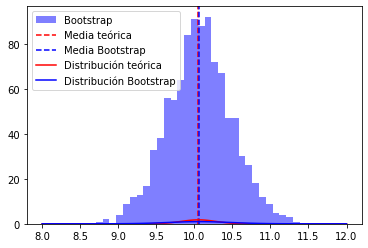

In [25]:
plt.hist(bootstrap_means, bins=30, color="blue", alpha=0.5, label="Bootstrap")
plt.axvline(np.mean(data), color="red", linestyle="--", label="Media teórica")
plt.axvline(np.mean(bootstrap_means), color="blue", linestyle="--", label="Media Bootstrap")
x = np.linspace(8, 12, 100)
plt.plot(x, stats.norm(loc=np.mean(data), scale=se_theoretical).pdf(x), color="red", label="Distribución teórica")
plt.plot(x, stats.norm(loc=np.mean(bootstrap_means), scale=se_bootstrap).pdf(x), color="blue", label="Distribución Bootstrap")
plt.legend()
plt.show()

| **Inicio** | **atrás 32** | **Siguiente 34** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./32.Regresion.ipynb)| [⏩](./34.Modelos_de_Regresion.ipynb)|